Dataset: https://astronn.readthedocs.io/en/latest/galaxy10.html

In [1]:
from keras import layers, models
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from h5py import File
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2025-10-14 16:09:07.137058: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-14 16:09:07.145452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760472547.156625   68574 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760472547.159989   68574 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760472547.168170   68574 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
SEED = 64

In [3]:
model = models.Sequential()

model.add(layers.RandomFlip("horizontal", input_shape=(256, 256, 1)))
model.add(layers.RandomRotation(0.3))

model.add(layers.Conv2D(32, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(96, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

/home/brandon/anaconda3/envs/galaxy10_decals2/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1760472548.898280   68574 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4143 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [4]:
with File("Galaxy10_DECals.h5", "r") as f:
    labels = np.array(f["ans"])
    n_samples = len(labels)
    indices = np.arange(n_samples)
    _, subset_indices = train_test_split(
        indices,
        test_size=0.35,
        stratify=labels,
        random_state=SEED
    )
    subset_indices = np.sort(subset_indices)

    X = np.array(f["images"])[subset_indices].astype(np.float32) / 255.0
    X = np.mean(X, axis=-1, keepdims=True)
    y = labels[subset_indices].astype(np.float32)

del labels
del indices
del subset_indices

In [5]:
train_images, test_images, train_labels, test_labels = train_test_split(
        X, y, 
        test_size=0.2, 
        stratify=y, 
        random_state=SEED
    )

In [6]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-7)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
hst = model.fit(train_images, train_labels, epochs=120, batch_size=64, callbacks=[reduce_lr, early_stop], validation_split=0.2)

Epoch 1/120


E0000 00:00:1760472583.249965   68574 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1760472583.802515   68641 cuda_dnn.cc:529] Loaded cuDNN version 90101
2025-10-14 16:09:53.867432: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 232ms/step - accuracy: 0.1220 - loss: 2.3354 - val_accuracy: 0.1479 - val_loss: 2.2415 - learning_rate: 0.0010
Epoch 2/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.1827 - loss: 2.1687 - val_accuracy: 0.2062 - val_loss: 2.1290 - learning_rate: 0.0010
Epoch 3/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.2421 - loss: 2.0303 - val_accuracy: 0.2928 - val_loss: 2.0746 - learning_rate: 0.0010
Epoch 4/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.3174 - loss: 1.8705 - val_accuracy: 0.3551 - val_loss: 1.8102 - learning_rate: 0.0010
Epoch 5/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.3264 - loss: 1.7611 - val_accuracy: 0.3481 - val_loss: 1.8203 - learning_rate: 0.0010
Epoch 6/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.3913 - loss: 1.6747 - val_accuracy: 0.3833 - val_loss: 1.6598 - learning_rate: 0.0010
Epoch 7/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.3941 - loss: 1.6572 

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6882 - loss: 0.8928
Test accuracy: 0.706


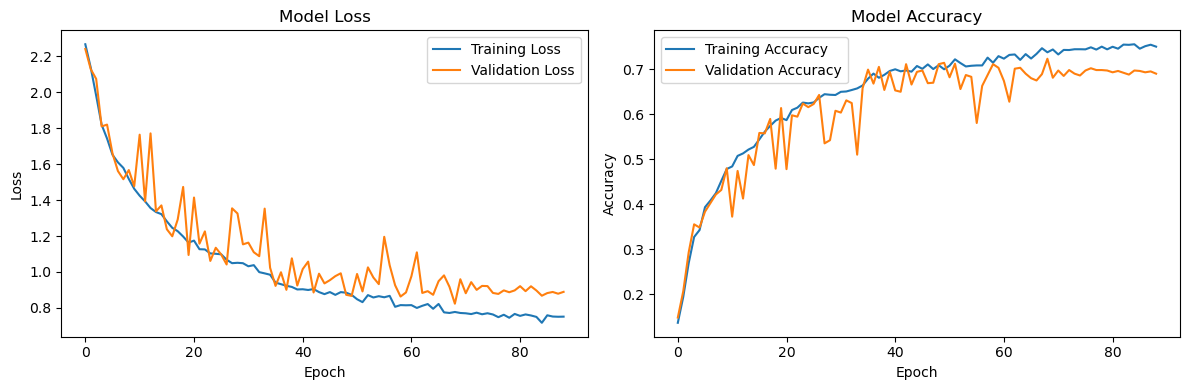

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hst.history['loss'], label='Training Loss')
plt.plot(hst.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(hst.history['accuracy'], label='Training Accuracy')
plt.plot(hst.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()